In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import stats, spatial
import pickle
import csv
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  # This is added back by InteractiveShellApp.init_path()


In [2]:
tfidf_path = '../../data/tfidf_merged_chs_202001_full/'

In [3]:
lda_path = '../../data/lda_merged_chs_202001_full/'

In [4]:
fandom_list = [item for item in os.listdir(lda_path) if 'tsv' in item]

In [5]:
fandom_list = [item.split('_temporal')[0] for item in fandom_list]

In [6]:
fandom_list

['hetalia_axis_powers',
 'doctor_who_&_related_fandoms',
 'attack_on_titan',
 'buffy_the_vampire_slayer',
 'the_walking_dead_&_related_fandoms',
 'shakespare_william_works',
 'dragon_age_all_media_types',
 'sherlock_holmes_&_related_fandoms',
 'harry_potter',
 'arthurian_mythology_&_related_fandoms',
 'one_direction',
 'tolkien_j_r_r_works_&_related_fandoms',
 'naruto',
 'supernatural',
 'bishoujo_senshi_sailor_moon',
 'dcu',
 'hamilton_miranda',
 'star_wars_all_media_types',
 'marvel',
 'haikyuu',
 'kuroko_no_basuke',
 'les_miserables_all_media_types',
 'ms_paint_adventures']

In [7]:
# fandom_list

In [18]:
def check_dist(fandom_name):
    df_topic = pd.read_csv(os.path.join(lda_path, fandom_name + \
                                        '_temporal_lda_jsd_toprev_with_dist_merged_chs_no_text.tsv'), sep='\t')
    # highest 10%
    topic_high_th = np.percentile(df_topic.JSD,90)
    # lowest 10%
    topic_low_th = np.percentile(df_topic.JSD, 10)
    topic_high = df_topic[df_topic.JSD > topic_high_th ]
    topic_mod = df_topic[(df_topic.JSD <= topic_high_th) & (df_topic.JSD > topic_low_th) ]
    topic_low = df_topic[df_topic.JSD < topic_low_th ]

    plt.figure()
    plt.hist(topic_high.Kudos)
    plt.yscale('log')
    plt.title(fandom_name + ' ' + 'Topic high')
    plt.figure()
    plt.hist(topic_mod.Kudos)
    plt.yscale('log')
    plt.title(fandom_name + ' ' + 'Topic med')
    plt.figure()
    plt.hist(topic_low.Kudos)
    plt.yscale('log')
    plt.title(fandom_name + ' ' + 'Topic low')
    
    df_term = pd.read_csv(os.path.join(tfidf_path, fandom_name + \
                                       '_temporal_tfidf_cos_merged_chapters_full.tsv'), sep='\t')
    print(fandom_name)
    print(np.percentile(df_term.Cos, 90))
    print(np.percentile(df_term.Cos, 10))
    # highest 10%
    term_high_th = np.percentile(df_term.Cos, 90)
    # lowest 10%
    term_low_th = np.percentile(df_term.Cos, 10)
    term_high = df_term[df_term.Cos > term_high_th ]
    term_mod = df_term[(df_term.Cos <= term_high_th) & (df_term.Cos > term_low_th) ]
    term_low = df_term[df_term.Cos < term_low_th ]

    plt.figure()
    plt.hist(term_high.Kudos)
    plt.yscale('log')
    plt.title(fandom_name + ' ' + 'term high')
    plt.figure()
    plt.hist(term_mod.Kudos)
    plt.yscale('log')
    plt.title(fandom_name + ' ' + 'term med')
    plt.figure()
    plt.hist(term_low.Kudos)
    plt.yscale('log')
    plt.title(fandom_name + ' ' + 'term low')

hetalia_axis_powers
0.6053876621834842
0.27662991977745205
doctor_who_&_related_fandoms
0.5976592449319859
0.23074273992299105
attack_on_titan
0.5889334764665178
0.2193359180393164


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, 

buffy_the_vampire_slayer
0.5936806315108968
0.21821106352273395
the_walking_dead_&_related_fandoms
0.5534854273105819
0.23330315781303204
shakespare_william_works
0.5634825999525919
0.23018562632107775
dragon_age_all_media_types
0.5807746059348001
0.2373698904681353
sherlock_holmes_&_related_fandoms
0.5921297406112701
0.22131246202617824
harry_potter
0.6028897381130374
0.2654697173946662
arthurian_mythology_&_related_fandoms
0.5718194505796006
0.19983091811026416
one_direction
0.581606206879061
0.18357809621790483
tolkien_j_r_r_works_&_related_fandoms
0.5992386468434354
0.24526470738714692
naruto
0.565626502577218
0.27157384212723334
supernatural
0.5966061634645816
0.20768871442851755
bishoujo_senshi_sailor_moon
0.5561539977903966
0.19795905419797435
dcu
0.640079096101398
0.22398147483330744
hamilton_miranda
0.6456228195649287
0.19762851929921516
star_wars_all_media_types
0.604756719797725
0.22570101410402105
marvel
0.6390621620257091
0.23063859240498474
haikyuu
0.6330818575434802
0.21

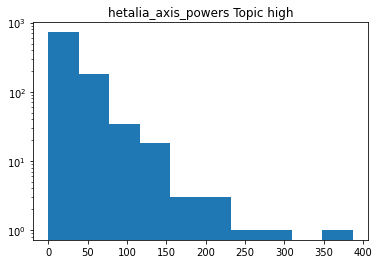

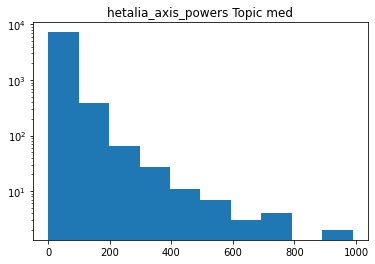

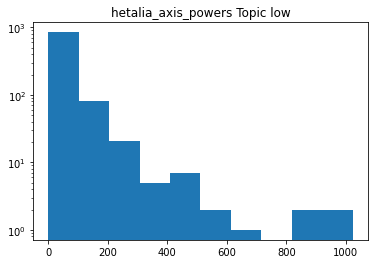

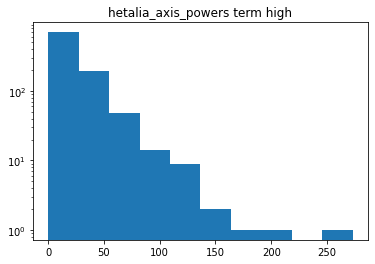

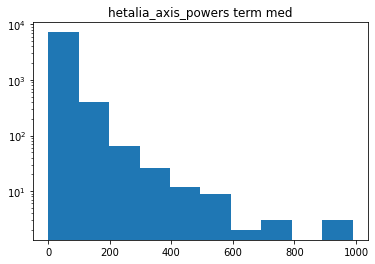

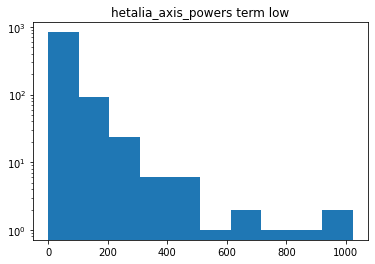

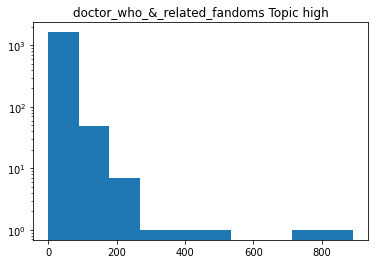

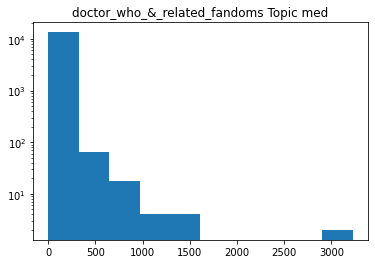

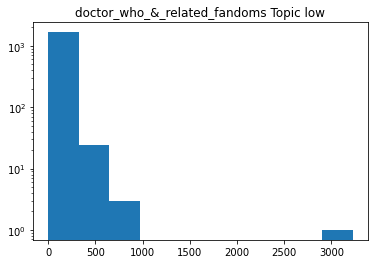

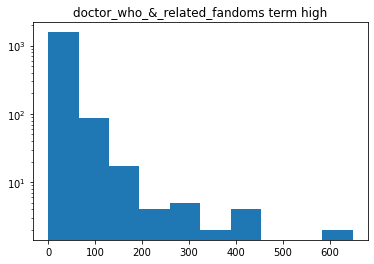

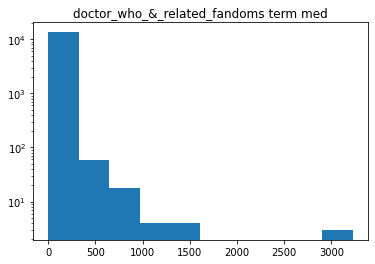

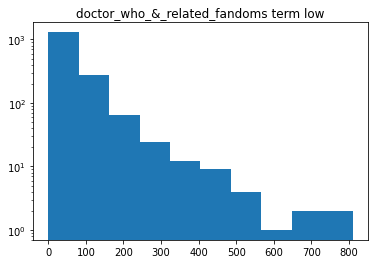

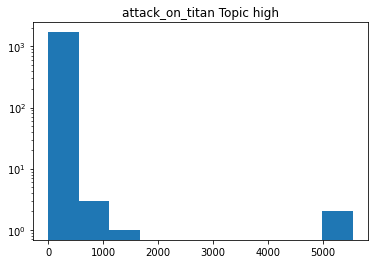

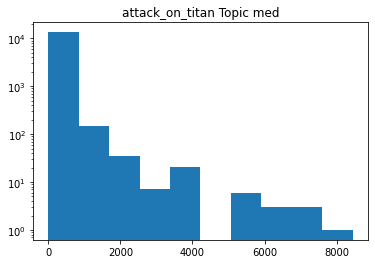

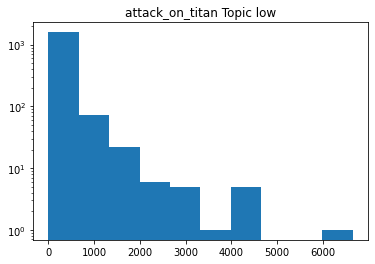

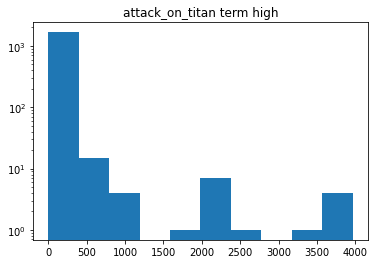

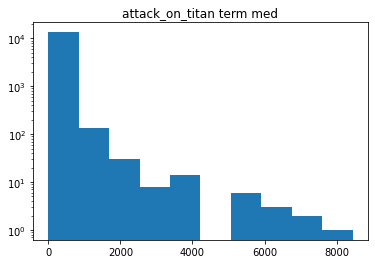

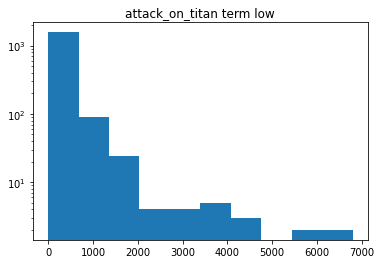

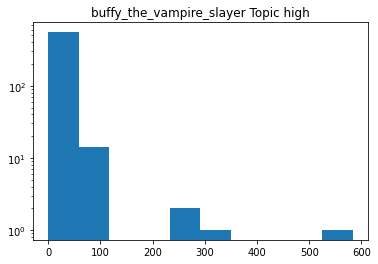

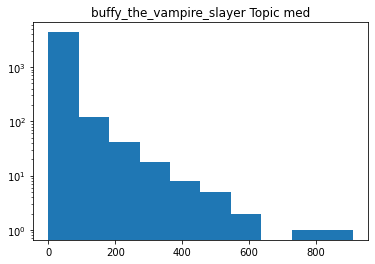

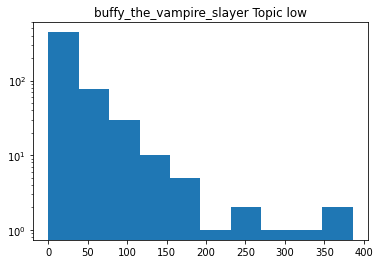

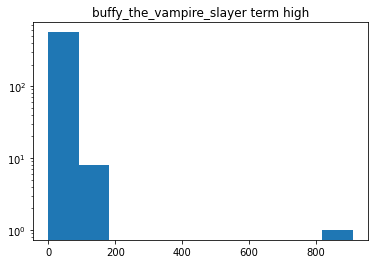

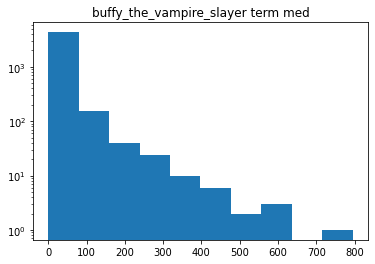

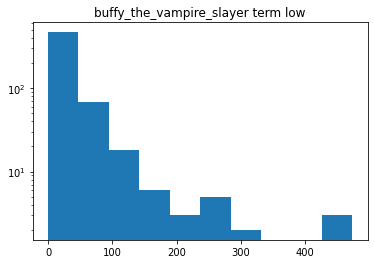

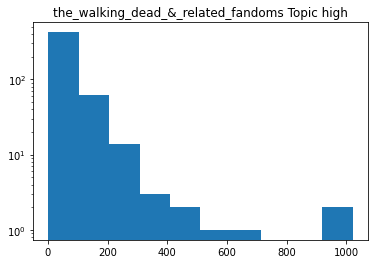

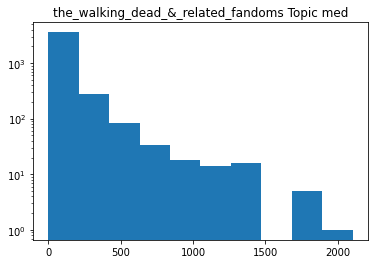

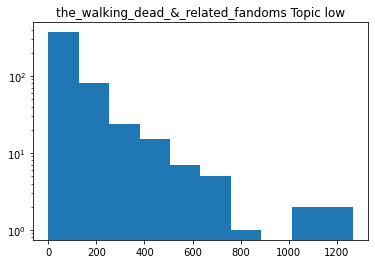

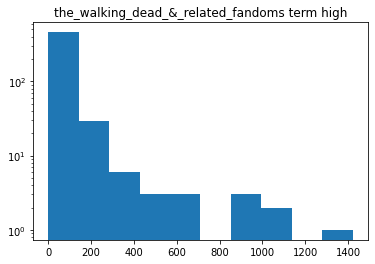

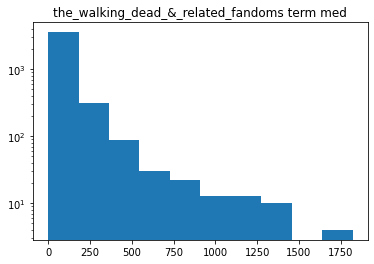

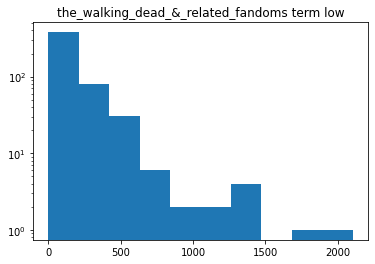

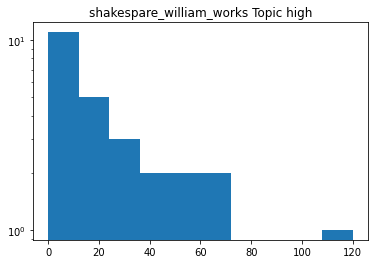

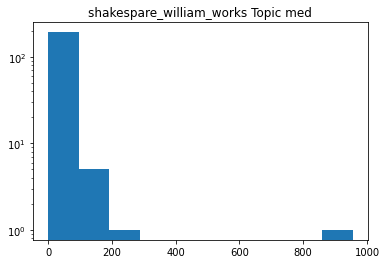

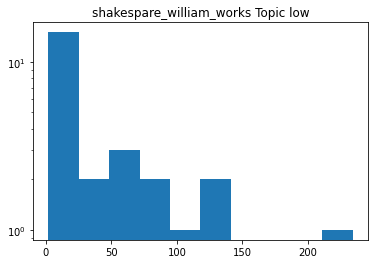

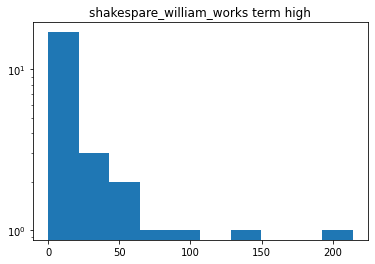

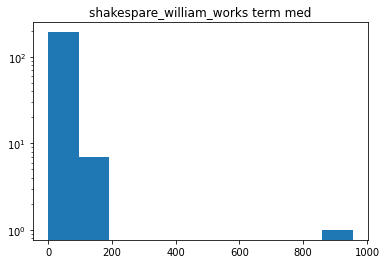

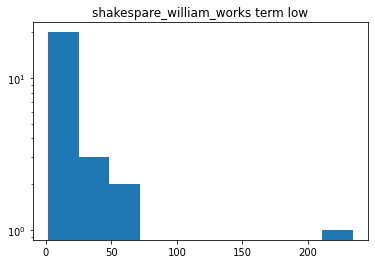

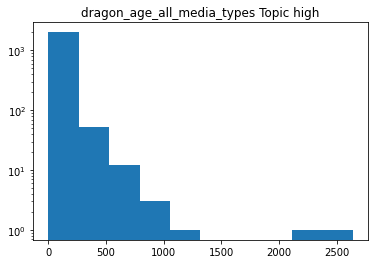

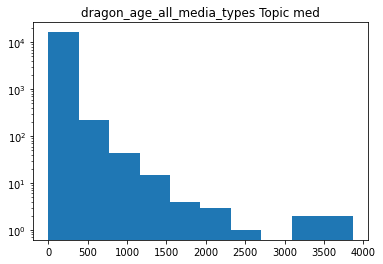

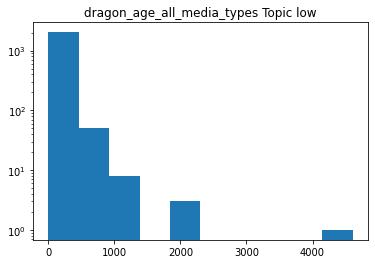

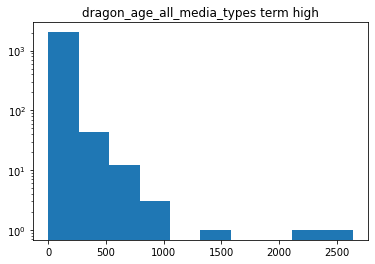

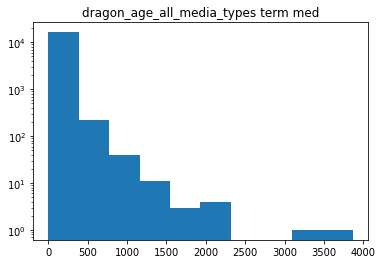

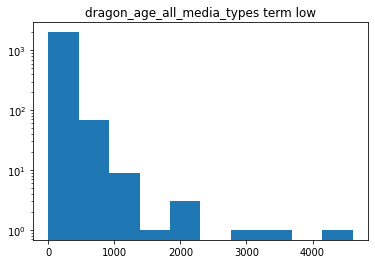

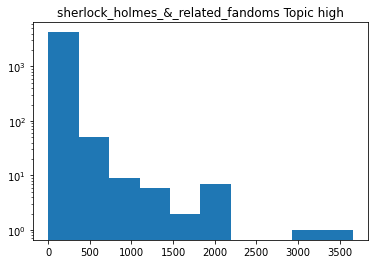

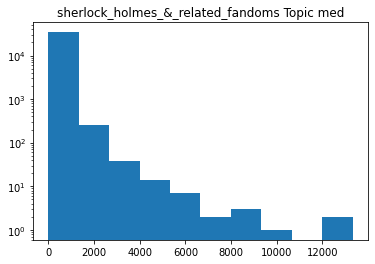

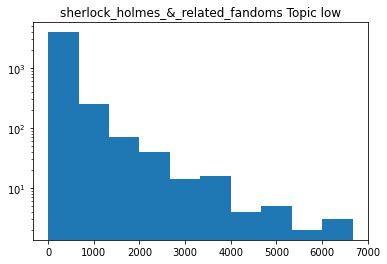

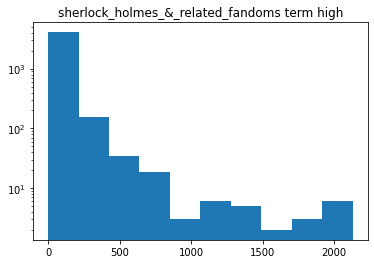

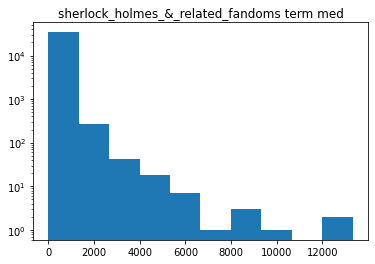

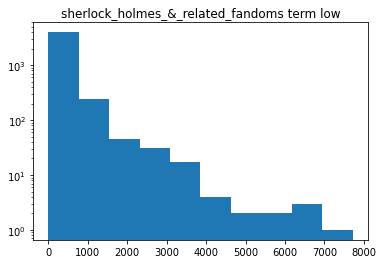

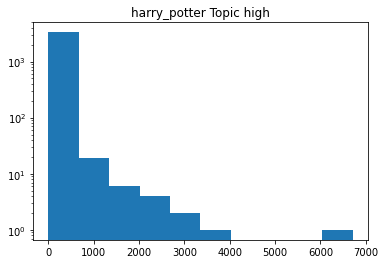

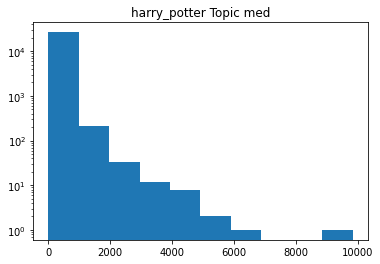

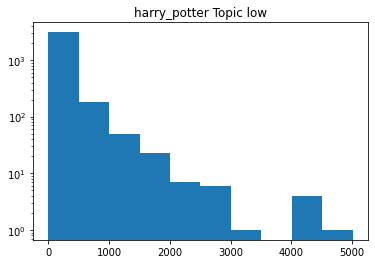

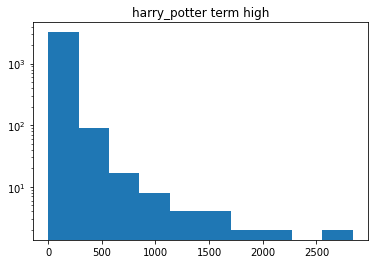

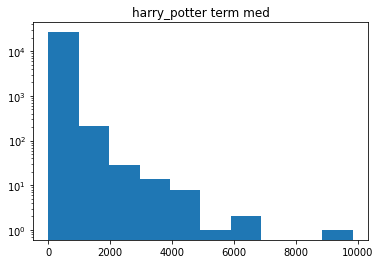

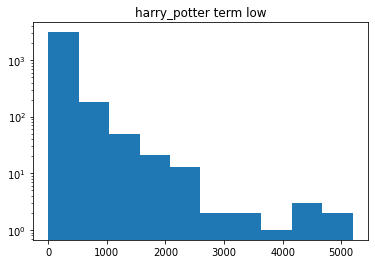

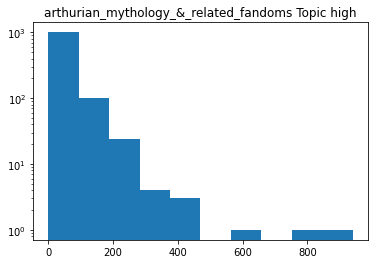

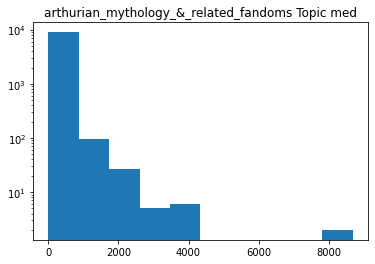

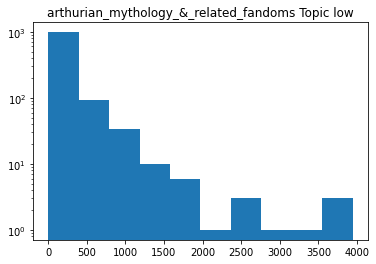

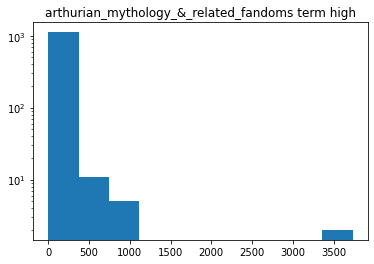

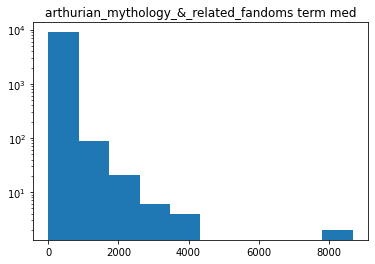

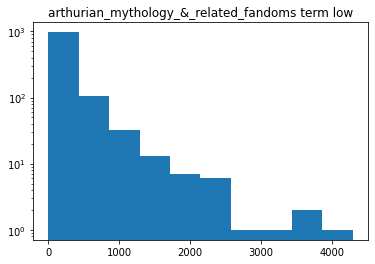

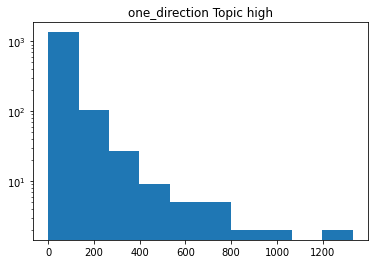

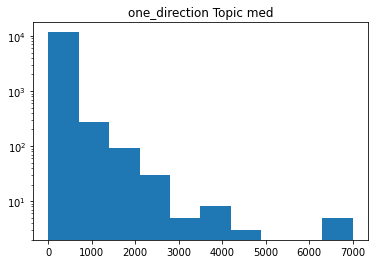

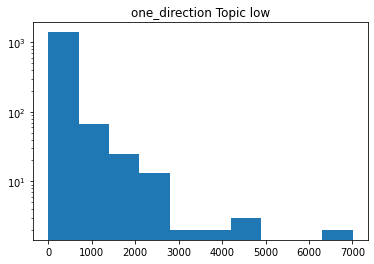

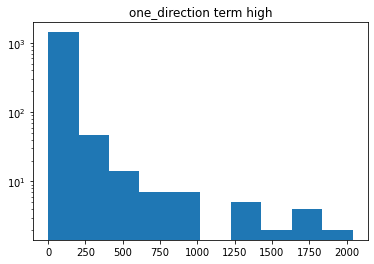

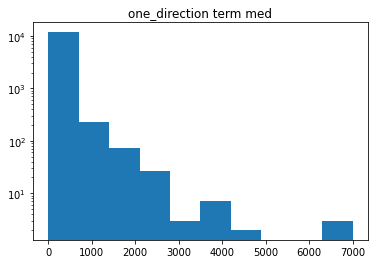

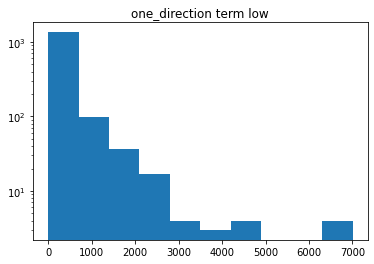

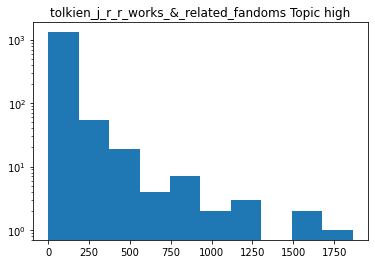

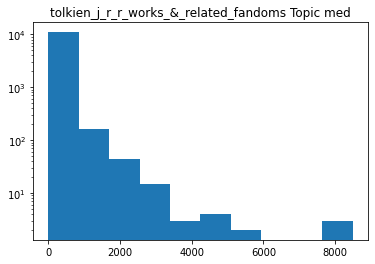

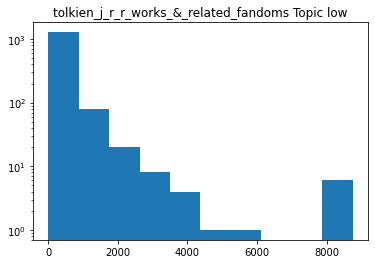

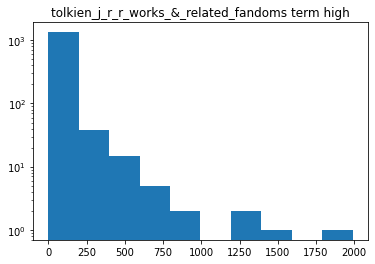

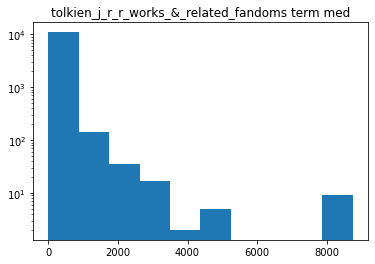

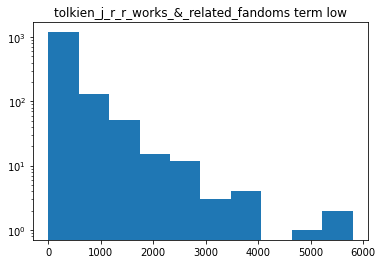

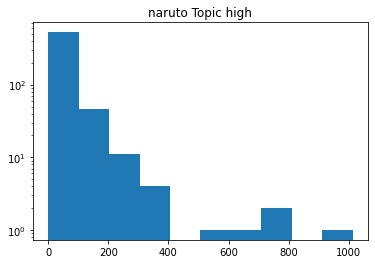

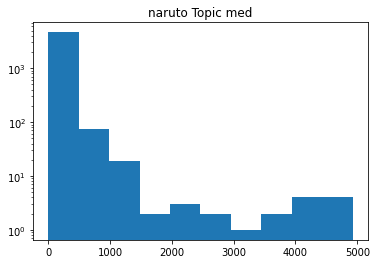

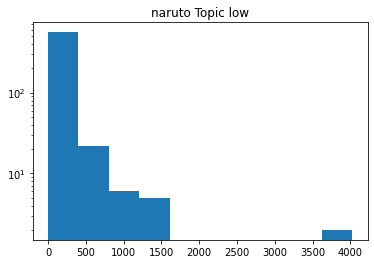

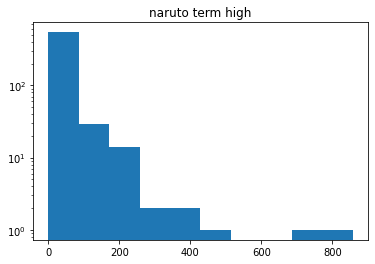

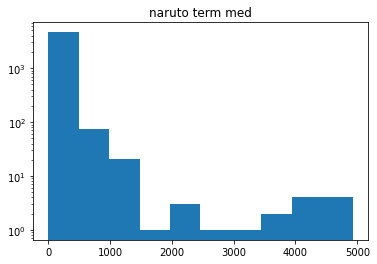

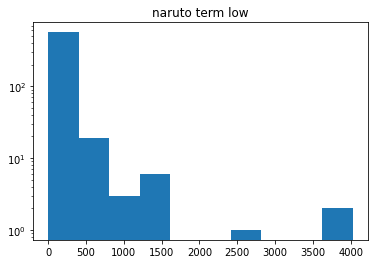

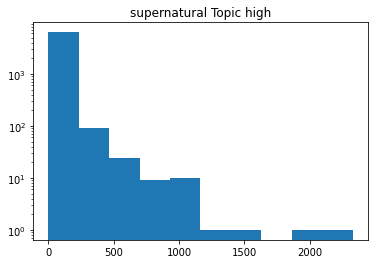

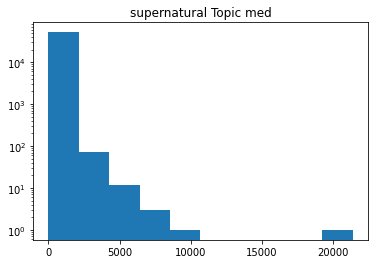

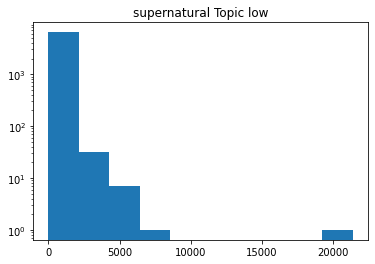

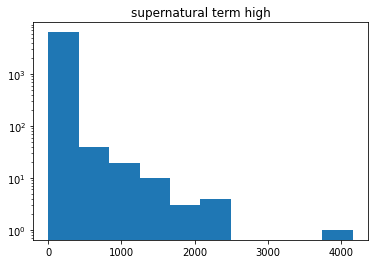

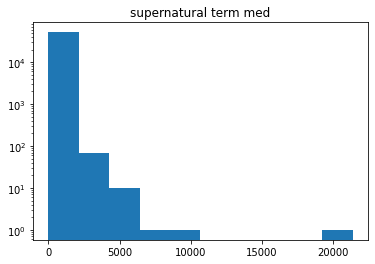

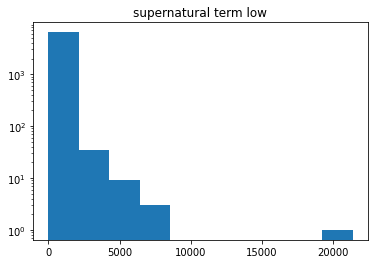

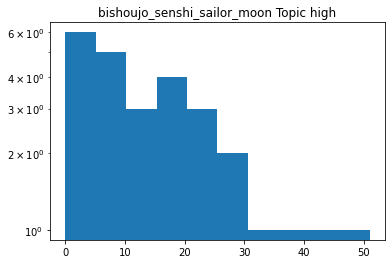

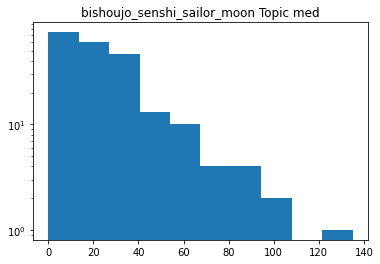

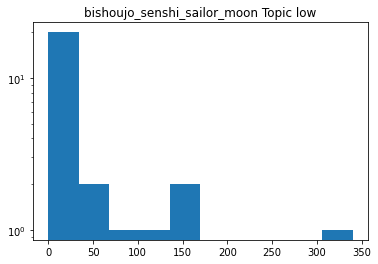

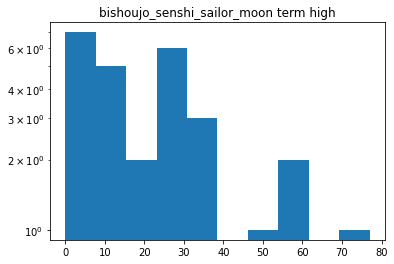

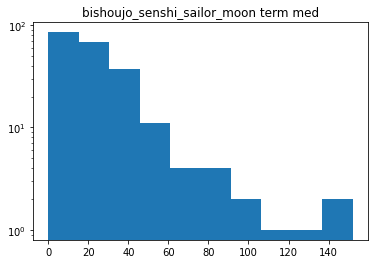

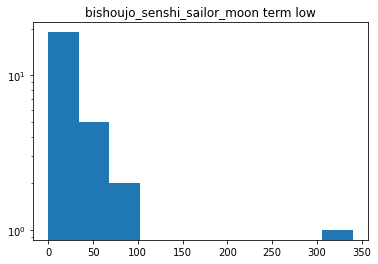

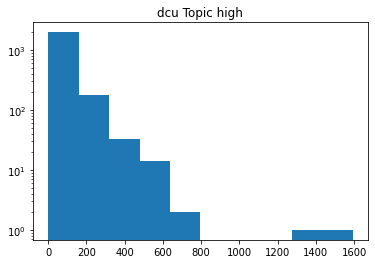

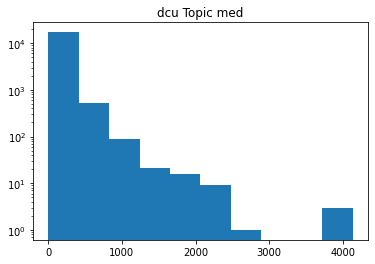

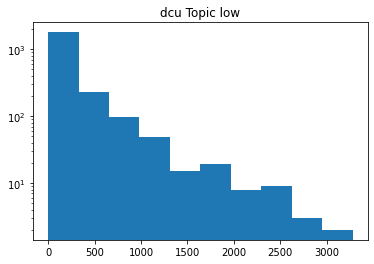

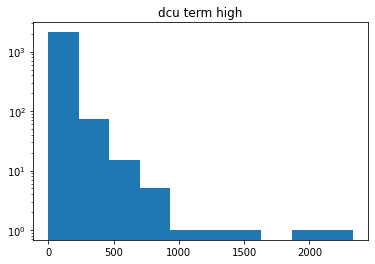

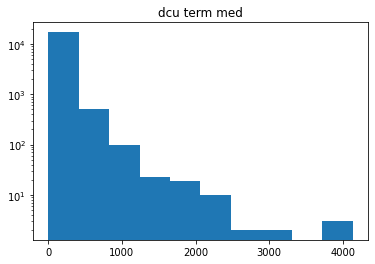

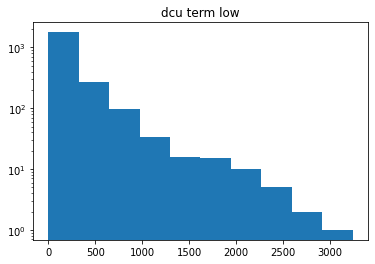

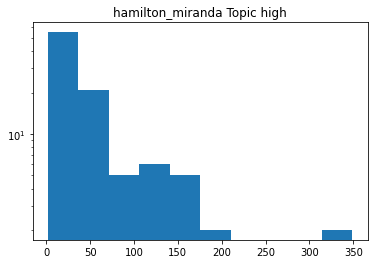

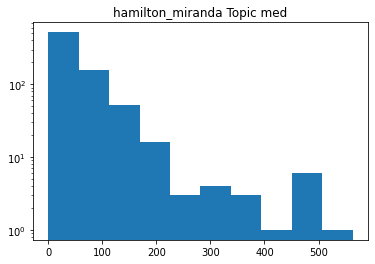

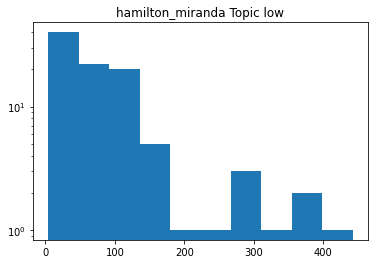

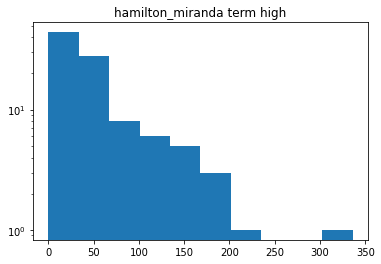

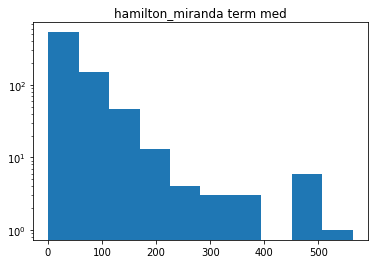

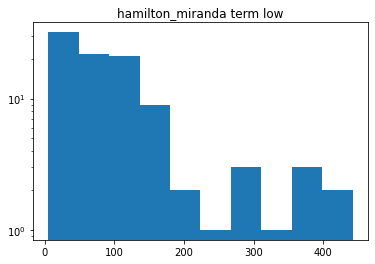

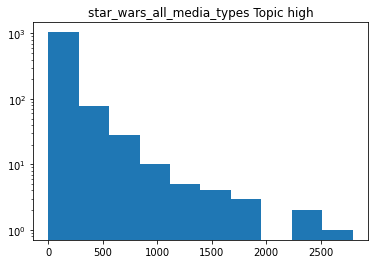

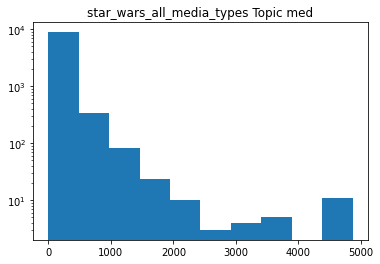

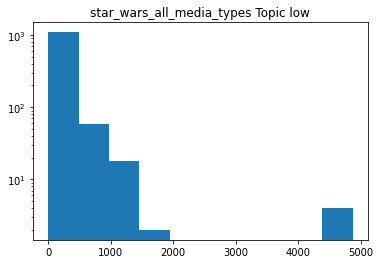

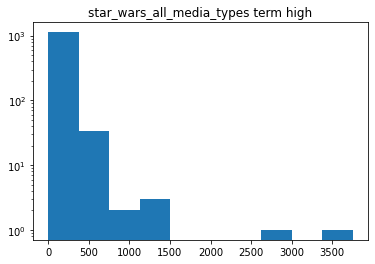

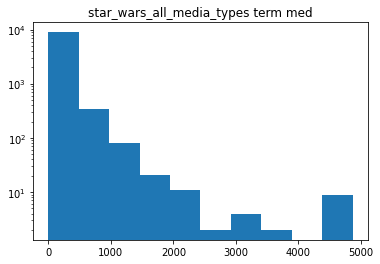

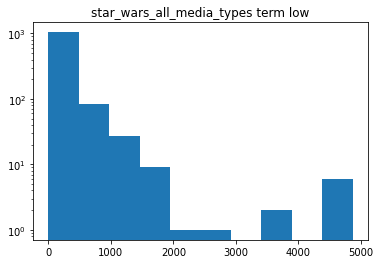

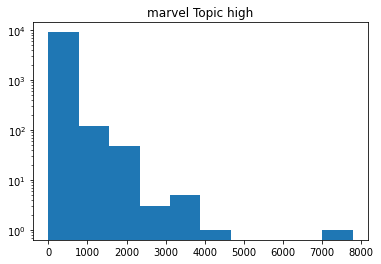

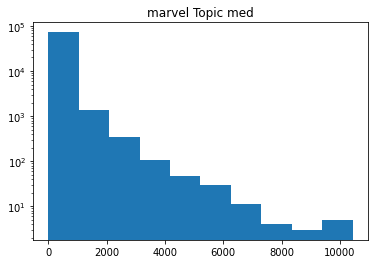

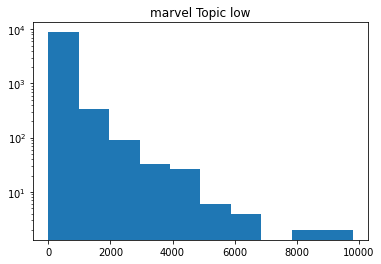

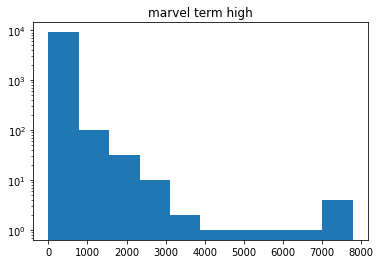

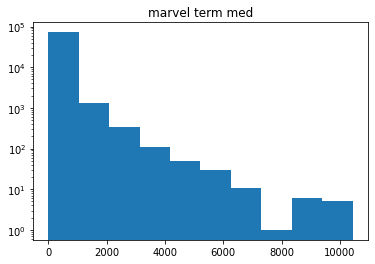

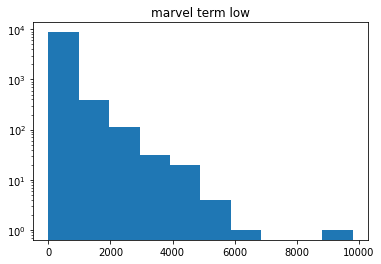

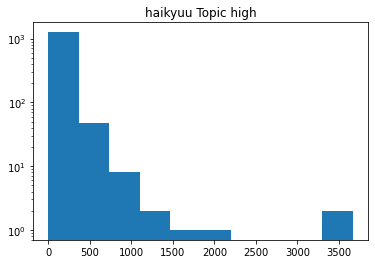

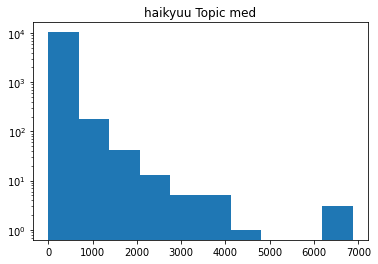

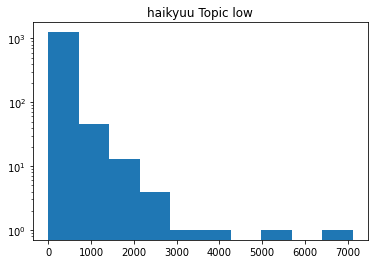

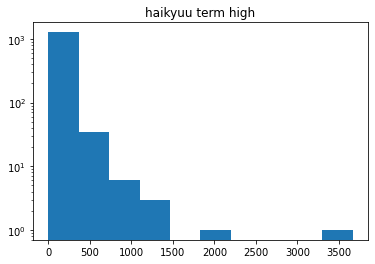

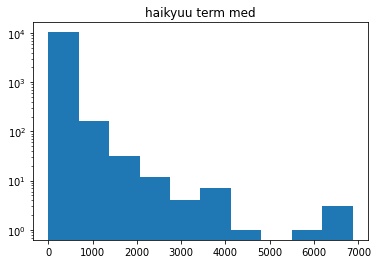

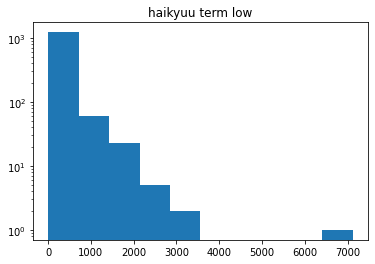

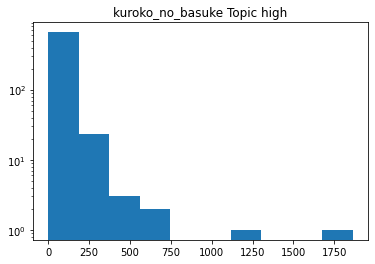

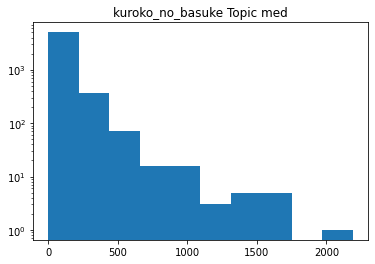

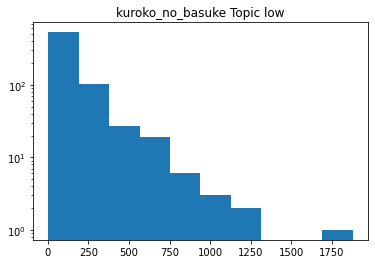

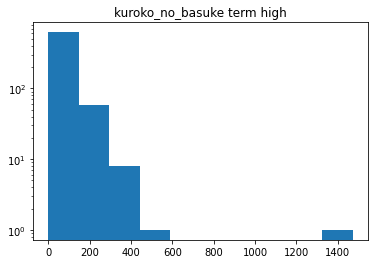

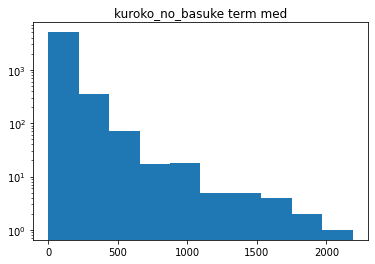

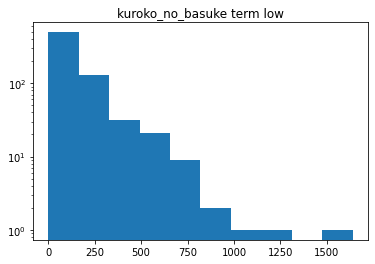

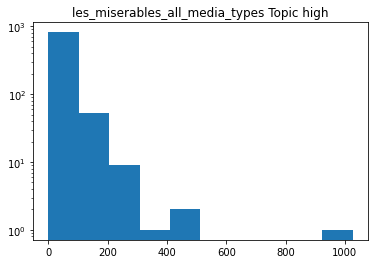

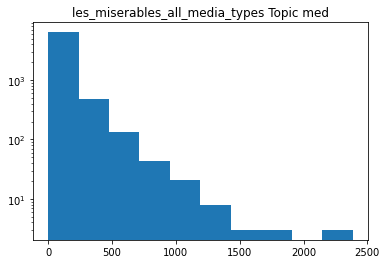

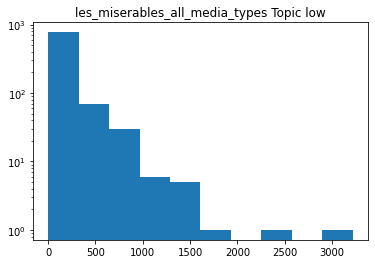

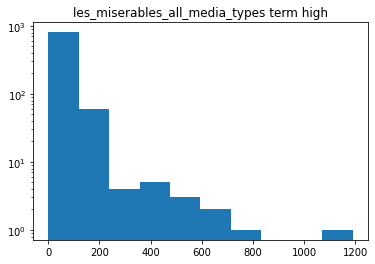

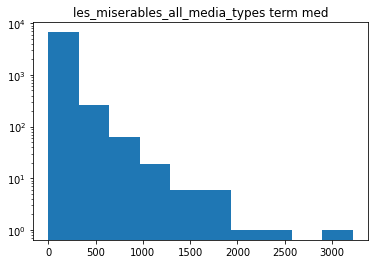

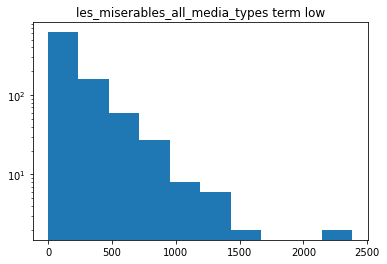

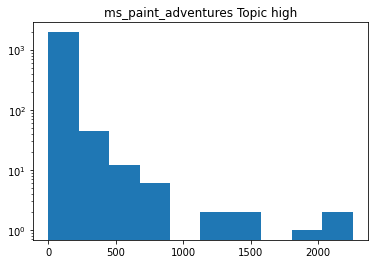

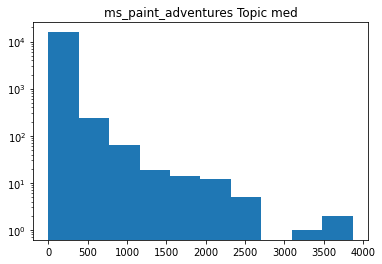

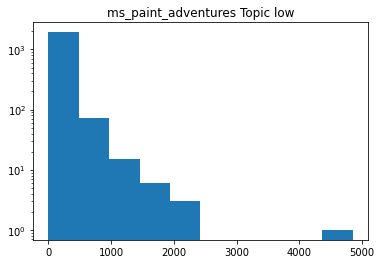

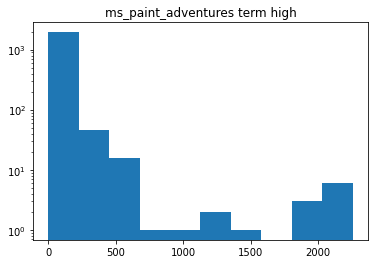

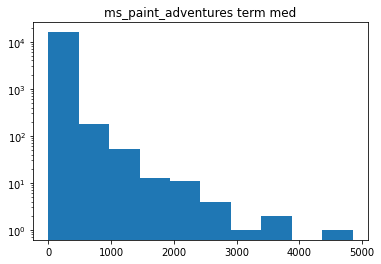

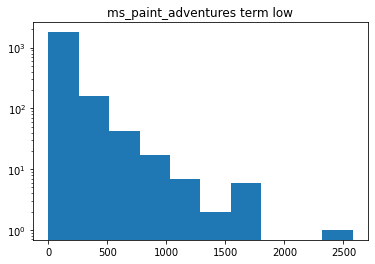

In [19]:
for fandom in fandom_list:
    check_dist(fandom)

In [10]:
df = pd.read_csv('../../data/fanfic_regression_data_merged_chs.tsv', sep='\t')

In [11]:
df.head(2)

,Bookmarks,Chapters,Hits,Kudos,Words,Comments,URL,Term_novelty,Entropy,Dist,...,Fandom_tolkien,Fandom_shakespare,Fandom_hetalia,Fandom_attack_on_titan,Fandom_ms_paint_adventures,Fandom_marvel,Fandom_sailor_moon,Fandom_one_direction,Fandom_sherlock,History
0,21,24,2399.0,53.0,66258.0,16,http://archiveofourown.org/works/488677/chapte...,0.603058,5.315078,"[0.000955473, 0.008187229, 0.0005799397, 0.001...",...,0,0,0,0,0,0,0,0,0,4280.0
1,7,1,2333.0,80.0,3542.0,3,http://archiveofourown.org/works/208853?view_a...,0.452716,5.723015,"[3.522977e-05, 1.2239097e-05, 0.16778131, 0.00...",...,0,0,0,0,0,0,0,0,0,4285.0
